In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string

In [4]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [18]:
alphabet = pd.Series([i for i in string.ascii_uppercase])

In [44]:
def plot_img_letter(ser):
    plt.imshow(ser[1:].values.reshape(28,28),cmap='gray')
    print('Picture show letter: {}'.format(alphabet[ser[0]]))
    plt.show()

Picture show letter: D


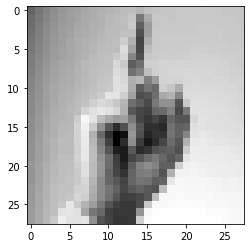

In [27]:
plot_img_letter(ser=train_df.iloc[0,:])

Picture show letter: T


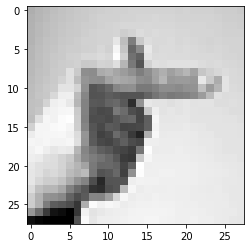

Picture show letter: Q


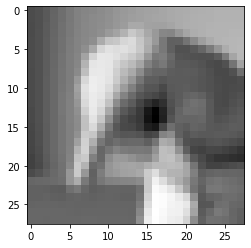

Picture show letter: D


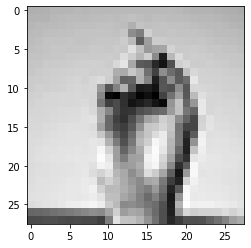

Picture show letter: V


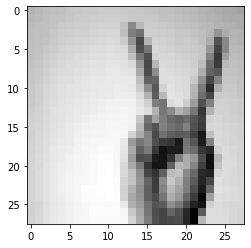

Picture show letter: K


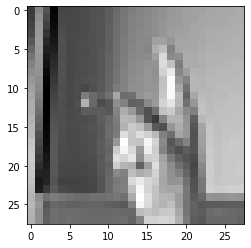

Picture show letter: A


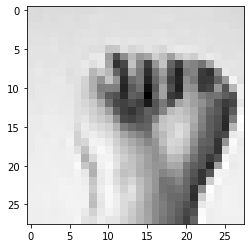

Picture show letter: T


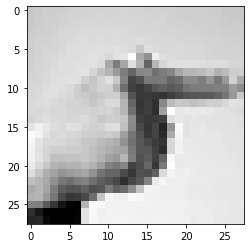

Picture show letter: O


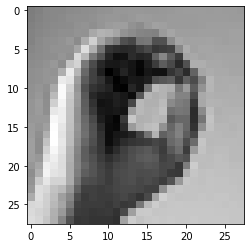

Picture show letter: O


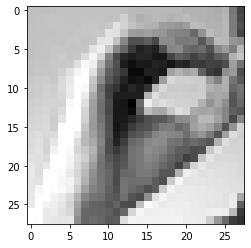

Picture show letter: S


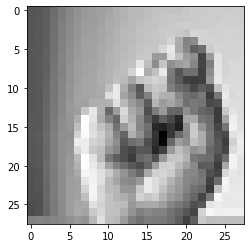

[None, None, None, None, None, None, None, None, None, None]

In [45]:
[plot_img_letter(ser=train_df.iloc[np.random.randint(1000),:]) for i in range(10)]

# Creating X_train, X_test, y_train, y_test

In [140]:
X_train, X_test, y_train, y_test = train_df.iloc[:,1:], test_df.iloc[:,1:], train_df.iloc[:,0], test_df.iloc[:,0]

In [157]:
test_df.iloc[:,0].unique()

array([ 6,  5, 10,  0,  3, 21, 14,  7,  8, 12,  4, 22,  2, 15,  1, 13, 19,
       18, 23, 17, 20, 16, 11, 24], dtype=int64)

# let's analyse out dataset

In [142]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28,1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28,1))

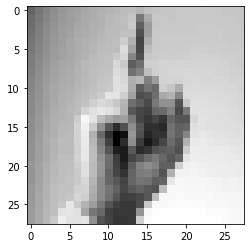

In [135]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

In [143]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (27455, 28, 28, 1)
Shape of y_train (27455,)
Shape of X_test (7172, 28, 28, 1)
Shape of y_test (7172,)


# LeNet

In [150]:
import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.datasets import mnist
from keras.utils import np_utils
import keras


# Lets store the number of rows and columns
img_rows =  X_train.shape[1]
img_cols = X_train.shape[2]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)


# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train.values)
y_test = np_utils.to_categorical(y_test.values)

num_classes = y_test.shape[1]
num_pixels = img_rows * img_cols

In [160]:
# create model
model = Sequential()

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 128)     

In [161]:
# Training Parameters
batch_size = 128
epochs = 10

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

model.save("mnist_LeNet_V0.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 4s 156us/step - loss: 0.8070 - acc: 0.7894 - val_loss: 0.2539 - val_acc: 0.9244
Epoch 2/10
27455/27455 [==============================] - 3s 102us/step - loss: 0.0780 - acc: 0.9909 - val_loss: 0.4112 - val_acc: 0.8793
Epoch 3/10
27455/27455 [==============================] - 3s 102us/step - loss: 0.0224 - acc: 0.9978 - val_loss: 0.1445 - val_acc: 0.9481
Epoch 4/10
27455/27455 [==============================] - 3s 102us/step - loss: 0.0100 - acc: 0.9991 - val_loss: 0.1521 - val_acc: 0.9644
Epoch 5/10
27455/27455 [==============================] - 3s 102us/step - loss: 0.0061 - acc: 0.9994 - val_loss: 0.1651 - val_acc: 0.9533
Epoch 6/10
27455/27455 [==============================] - 3s 102us/step - loss: 0.0036 - acc: 0.9997 - val_loss: 0.1515 - val_acc: 0.9710
Epoch 7/10
27455/27455 [==============================] - 3s 103us/step - loss: 0.0025 - acc: 0.9997 - val_loss: 0.2353 - v

In [169]:
import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    return alphabet[number]

def draw_test(name, pred, actual, input_im):
    BLACK = [0,0,0]

    res = getLabel(pred)
    actual = getLabel(actual)  
    
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, 4*imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)


for i in range(0,30):
    rand = np.random.randint(0,len(X_test))
    input_im = X_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, actual, imageL) 
    cv2.waitKey(0)
    
cv2.destroyAllWindows()